# 基础知识点复习

### 测试环境

In [2]:
# 测试连接
print('hello NLP!')

hello NLP!


### 使用Python的对话模式来生成向量和矩阵

In [3]:
# 使用Python的对话模式来生成向量和矩阵
import numpy as np
x = np.array([1,2,3])

In [6]:
print(x)

[1 2 3]


In [4]:
print(x.__class__)

<class 'numpy.ndarray'>


In [7]:
x.ndim

1

In [5]:
x.shape

(3,)

In [8]:
w = np.array([[1,2,3],[4,5,6]])

In [9]:
print(w)

[[1 2 3]
 [4 5 6]]


In [11]:
w.ndim

2

In [10]:
w.shape

(2, 3)

### 矩阵对应元素的运算

In [12]:
# 矩阵对应元素的运算
W = np.array([
    [1,2,3],
    [4,5,6]
])
X = np.array([
    [0,1,2],
    [3,4,5]
])

### 矩阵对应元素相加

In [13]:
# 矩阵对应元素相加
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

### 广播（对形状不同的矩阵进行扩展运算）

In [14]:
# 广播（对形状不同的矩阵进行扩展运算）
A = np.array([
    [1,2],
    [3,4]
])

A*10

array([[10, 20],
       [30, 40]])

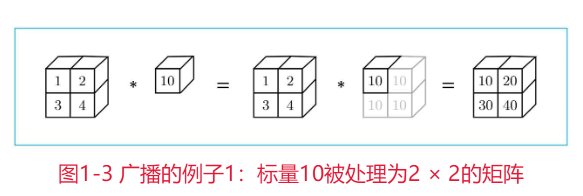

In [16]:
A = np.array([
    [1,2],
    [3,4]
])
b = np.array([10,20])

A*b

array([[10, 40],
       [30, 80]])

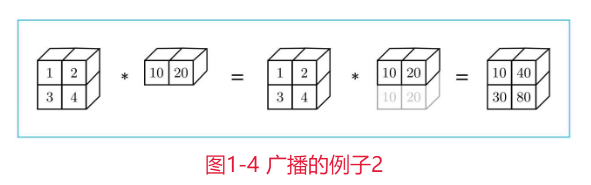

### 向量内积

In [17]:
# 向量内积
a = np.array([1,2,3])
b = np.array([4,5,6])
# 对应元素相乘再求和
np.dot(a,b)

32

### 矩阵相乘

In [18]:
A = np.array([
    [1,2],
    [3,4]
])
B = np.array([
    [5,6],
    [7,8]
])

np.dot(A,B)

array([[19, 22],
       [43, 50]])

### Tip:*与dot的区别

*乘是广播的形式，对应相乘。

dot()函数是乘法函数，是基本的数学定理。

# 推理一个神经网络

假设一个神经网络如下：

Input Layout Number Of Neurons：2

Hidden Layout Number Of Neurons:4

Output Layout Number Of Neurons:3

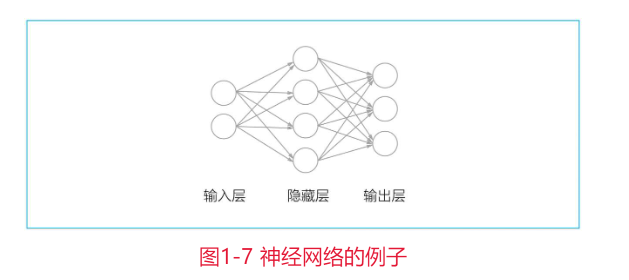

图1-7中的隐藏层的第1个神经元就可以如下进行计算：

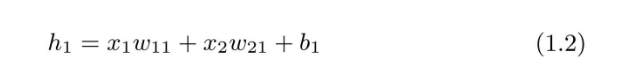

实际上，基于全连接层的变换可以通过矩阵乘积如下进行整理：

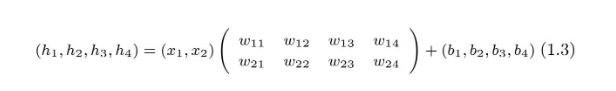

这里，隐藏层的神经元被整理为（h1, h2, h3, h4）​，它可以看作1×4的矩阵（或者行向量）​。另外，输入是（x1, x2）​，这是一个1×2的矩阵。再者，权重是2×4的矩阵，偏置是1×4的矩阵。这样一来，式（1.3）可以如下进行简化：

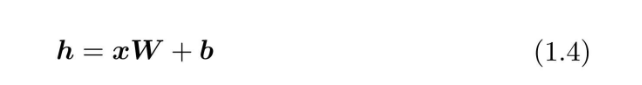

这里，输入是x，隐藏层的神经元是h，权重是W，偏置是b，这些都是矩阵。此时，留意式（1.4）的矩阵形状，可知进行了如图1-8所示的变换。

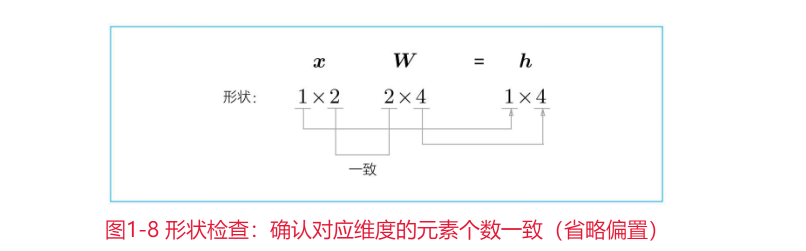


### 对N笔样本数据进行mini-batch整体处理

这样一来，我们就可以利用矩阵来整体计算全连接层的变换。不过，这里进行的变换只针对单笔样本数据（输入数据）​。在神经网络领域，我们会同时对多笔样本数据（称为mini-batch，小批量）进行推理和学习。因此，我们将单独的样本数据保存在矩阵x的各行中。假设要将N笔样本数据作为mini-batch整体处理，关注矩阵的形状，其变换如图1-9所示。

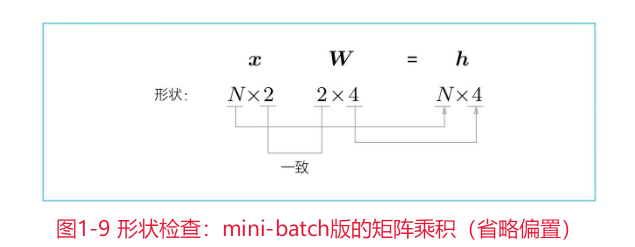

如图1-9所示，根据形状检查，可知各mini-batch被正确地进行了变换。此时，N笔样本数据整体由全连接层进行变换，隐藏层的N个神经元被整体计算出来。现在，我们用Python写出mini-batch版的全连接层变换。




In [2]:
import numpy as np
W1 = np.random.randn(2,4)#权重
b1 = np.random.randn(4)#偏置
x = np.random.randn(10,2)#输入

In [3]:
# 漂亮的输出
def print_array(name, array):
    print(f"{name}:\n{np.array2string(array, formatter={'float_kind':lambda x: f'{x:.2f}'}).replace('[', ' [ ').replace(']', ' ] ')}\n")

# 漂亮打印
print_array("W1", W1)
print_array("b1", b1)
print_array("x", x)
# print(W1)
# print(b1)
# print(x)

W1:
 [  [ 0.59 -0.03 -0.66 0.34 ] 
  [ 1.26 0.20 0.40 0.39 ]  ] 

b1:
 [ -0.13 0.29 0.71 -0.59 ] 

x:
 [  [ 0.68 -0.30 ] 
  [ 0.61 1.59 ] 
  [ -1.32 -0.22 ] 
  [ -0.28 -1.46 ] 
  [ -0.45 -0.54 ] 
  [ -0.23 0.74 ] 
  [ -0.63 0.06 ] 
  [ -0.69 -0.64 ] 
  [ -1.14 0.08 ] 
  [ -1.91 0.03 ]  ] 



In [4]:
h = np.dot(x,W1)

In [5]:
print(h)

[[ 0.01541824 -0.07780941 -0.56423005  0.11352836]
 [ 2.36181379  0.30508945  0.24420038  0.82618277]
 [-1.05767633 -0.01167805  0.77657853 -0.53929615]
 [-2.00645476 -0.28719947 -0.40608827 -0.66391479]
 [-0.95027583 -0.09784287  0.07836775 -0.36616892]
 [ 0.79998106  0.15462942  0.44639062  0.21033789]
 [-0.29843167  0.02764592  0.43850266 -0.1940934 ]
 [-1.21745191 -0.11217386  0.19384021 -0.48697679]
 [-0.56652608  0.04460651  0.77659209 -0.35778508]
 [-1.08445402  0.05330507  1.25909435 -0.64140617]]


In [10]:
h.shape

(10, 4)

In [11]:
h.ndim

2

In [17]:
b1.shape

(4,)

In [18]:
b1.ndim

1

In [6]:
print(h)
print('------------------------------------------')
print(b1)

[[ 0.01541824 -0.07780941 -0.56423005  0.11352836]
 [ 2.36181379  0.30508945  0.24420038  0.82618277]
 [-1.05767633 -0.01167805  0.77657853 -0.53929615]
 [-2.00645476 -0.28719947 -0.40608827 -0.66391479]
 [-0.95027583 -0.09784287  0.07836775 -0.36616892]
 [ 0.79998106  0.15462942  0.44639062  0.21033789]
 [-0.29843167  0.02764592  0.43850266 -0.1940934 ]
 [-1.21745191 -0.11217386  0.19384021 -0.48697679]
 [-0.56652608  0.04460651  0.77659209 -0.35778508]
 [-1.08445402  0.05330507  1.25909435 -0.64140617]]
------------------------------------------
[-0.13469563  0.28569531  0.70929718 -0.59326618]


In [7]:
h+b1# 广播

array([[-1.19277394e-01,  2.07885894e-01,  1.45067132e-01,
        -4.79737819e-01],
       [ 2.22711816e+00,  5.90784753e-01,  9.53497557e-01,
         2.32916587e-01],
       [-1.19237196e+00,  2.74017260e-01,  1.48587570e+00,
        -1.13256233e+00],
       [-2.14115039e+00, -1.50416032e-03,  3.03208912e-01,
        -1.25718097e+00],
       [-1.08497146e+00,  1.87852434e-01,  7.87664922e-01,
        -9.59435103e-01],
       [ 6.65285424e-01,  4.40324723e-01,  1.15568780e+00,
        -3.82928289e-01],
       [-4.33127306e-01,  3.13341233e-01,  1.14779984e+00,
        -7.87359577e-01],
       [-1.35214754e+00,  1.73521450e-01,  9.03137385e-01,
        -1.08024297e+00],
       [-7.01221716e-01,  3.30301822e-01,  1.48588926e+00,
        -9.51051258e-01],
       [-1.21914965e+00,  3.39000380e-01,  1.96839152e+00,
        -1.23467235e+00]])

### Tip:广播

之所以(10, 4)的h=W*x能与(4,)的b相加，是因为广播机制，使得h每一行都能与b1进行加和。

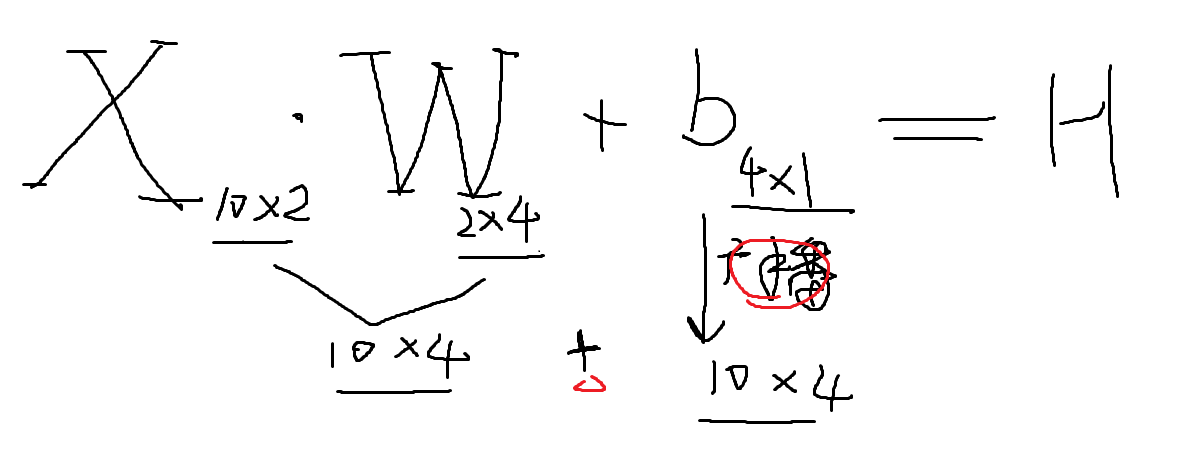

In [8]:
# 完整代码
import numpy as np
W1 = np.random.randn(2,4)#权重
b1 = np.random.randn(4)#偏置
x = np.random.randn(10,2)#输入
h = np.dot(x,W1)+b1

### Tip:矩阵形状

做矩阵乘法时是不存在交换律的，所以$M_1$是AxB形状的矩阵只能与$M_2$是BxC形状的矩阵相乘，np.dot($M_1$,$M_2$)中M1和M2位置不可换。

### 使用Sigmoid激活函数

全连接层的变换是线性变换。激活函数赋予它“非线性”的效果。严格地讲，使用非线性的激活函数，可以增强神经网络的表现力。

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$


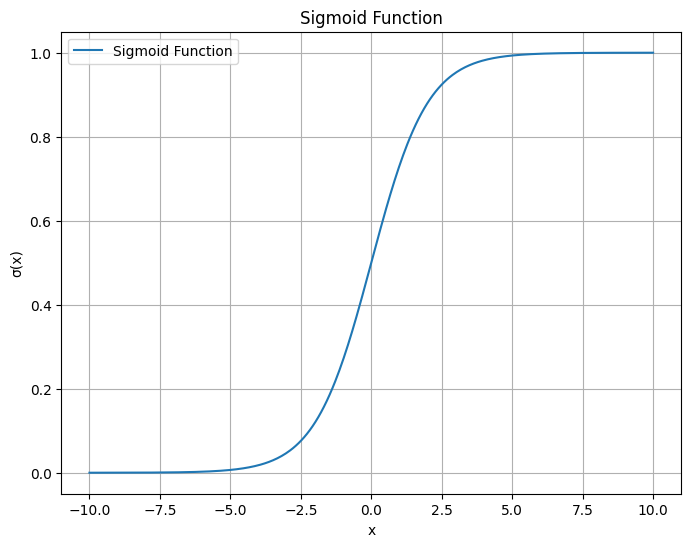

In [10]:
# 绘制Sigmoid图像
import numpy as np
import matplotlib.pyplot as plt

# 定义Sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成x值
x = np.linspace(-10, 10, 400)
# 计算Sigmoid函数的y值
y = sigmoid(x)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()


In [11]:
# 使用Python实现Sigmoid函数
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
Sigmoid(1)

0.7310585786300049

In [13]:
h

array([[-1.47407497,  0.58802038,  1.70889396,  1.39556953],
       [-2.5615688 ,  0.66517439,  0.6672476 ,  1.00202712],
       [-1.45304224, -0.72274523,  1.06198075,  1.93555729],
       [-3.57669353,  0.40927146, -0.47215332,  0.76801346],
       [-0.73148701,  0.75907423,  2.53416711,  1.57332108],
       [-1.750897  , -0.38816799,  0.93637993,  1.70031646],
       [-1.52285637,  0.88359885,  1.81099956,  1.25913572],
       [-2.44863113,  0.46292231,  0.67646122,  1.12187865],
       [-3.26950728,  0.91233956,  0.08949323,  0.66575883],
       [-0.01011141,  0.18064733,  2.9565039 ,  2.04876192]])

In [14]:
# 现在，我们使用这个sigmoid函数，来变换刚才的隐藏层的神经元。
a = Sigmoid(h)
print(a)

[[0.18632403 0.6429108  0.84669277 0.8014799 ]
 [0.07165312 0.66042178 0.66088658 0.73145695]
 [0.1895338  0.32678875 0.74306889 0.87386325]
 [0.02720709 0.60091318 0.38410671 0.68309101]
 [0.3248685  0.68115271 0.92650262 0.82825654]
 [0.1479341  0.4041584  0.71836784 0.84557606]
 [0.17904129 0.70756744 0.85948264 0.77887729]
 [0.07953871 0.6137072  0.66294842 0.75433702]
 [0.03663221 0.71347867 0.52235839 0.66055284]
 [0.49747217 0.54503942 0.95056998 0.88582246]]


In [15]:
# 完整代码
import numpy as np
# 定义激活函数
def Sigmoid(x):
    return 1/(1+np.exp(-x))
W1 = np.random.randn(2,4) # 权重
b1 = np.random.randn(4) # 偏置
x = np.random.randn(10,2) # 输入
h = np.dot(x,W1)+b1 # 计算隐藏层神经元结果
a = Sigmoid(h) # 使用Sigmoid激活函数对全连接的线性函数进行变换

基于sigmoid函数，可以进行非线性变换。然后，再用另一个全连接层来变换这个激活函数的输出a（也称为activation）​。这里，因为隐藏层有4个神经元，输出层有3个神经元，所以全连接层使用的权重矩阵的形状必须设置为4×3，这样就可以获得输出层的神经元。以上就是神经网络的推理。现在我们用Python将这一段内容总结如下。

In [16]:
import numpy as np

# activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Input Layout
x = np.random.randn(10,2)

# Hidden_1 Layout
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)

# Hidden_2 Layout(Output Layout)
W2 = np.random.randn(4,3) # x1(10,4) * W2(4,3) = (10,3)
b2 = np.random.randn(3)

# 神经网络计算过程
h = np.dot(x,W1)+b1
a = sigmoid(h)
s = np.dot(a,W2)+b2

print(s)

[[-0.65295511 -0.21510129  1.4104303 ]
 [-0.69818832 -0.33027493  1.58258664]
 [-1.68172506 -0.70207827  2.7521598 ]
 [-1.54766668 -0.70133203  2.62318762]
 [-1.62995651 -0.68952716  2.67807673]
 [-1.66924263 -0.74728407  2.78568819]
 [-1.22704402 -0.55877071  2.21417014]
 [-1.79847466 -0.69403342  2.85685119]
 [-1.59674403 -0.70376131  2.66984054]
 [-1.77306689 -0.826496    3.10038408]]


In [50]:
s.shape

(10, 3)

In [51]:
s.ndim

2

### 层的类化及正向传播

现在，我们将神经网络进行的处理实现为层。这里将全连接层的变换实现为Affine层，将sigmoid函数的变换实现为Sigmoid层。因为全连接层的变换相当于几何学领域的仿射变换，所以称为Affine层。另外，将各个层实现为Python的类，将主要的变换实现为类的forward（​）方法。

### Tip:正向传播&反向传播

神经网络的推理所进行的处理相当于神经网络的正向传播。顾名思义，正向传播是从输入层到输出层的传播。此时，构成神经网络的各层从输入向输出方向按顺序传播处理结果。之后我们会进行神经网络的学习，那时会按与正向传播相反的顺序传播数据（梯度）​，所以称为反向传播。

### 编写网络的代码规范

神经网络中有各种各样的层，我们将其实现为Python的类。通过这种模块化，可以像搭建乐高积木一样构建网络。本书在实现这些层时，制定以下“代码规范”​。

- 所有的层都有forward（​）方法和backward（​）方法
- 所有的层都有params和grads实例变量简单说明一下这个代码规范。

首先，forward（​）方法和backward（​）方法分别对应正向传播和反向传播。其次，params使用列表保存权重和偏置等参数（参数可能有多个，所以用列表保存）​。grads以与params中的参数对应的形式，使用列表保存各个参数的梯度（后述）​。这就是本书的代码规范。

In [17]:
# 首先实现Sigmoid层
# 因为这里只考虑正向传播，所以我们仅关注代码规范中的以下两点：
# 一是在层中实现forward（​）方法；
# 二是将参数整理到实例变量params中
import numpy as np

#定义激活层
class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self,x):
        return 1/(1+np.exp(-x))

如上所示，sigmoid函数被实现为一个类，主变换处理被实现为forward（x）方法。这里，因为Sigmoid层没有需要学习的参数，所以使用空列表来初始化实例变量params。下面，我们接着来看一下全连接层Affine层的实现，如下所示

In [19]:
# 定义全连接层
class Affine:
    def __init__(self,W,b):
        self.params = [W,b]

    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W)+b
        return out
    
##流程 x->Affine->Sigmoid

Affine层在初始化时接收权重和偏置。此时，Affine层的参数是权重和偏置（在神经网络的学习时，这两个参数随时被更新）​。因此，我们使用列表将这两个参数保存在实例变量params中。然后，实现基于forward（x）的正向传播的处理。

### 层视角下的神经网络

现在，我们使用上面实现的层来实现神经网络的推理处理。这里实现如图1-11所示的层结构的神经网络。

神经网络：

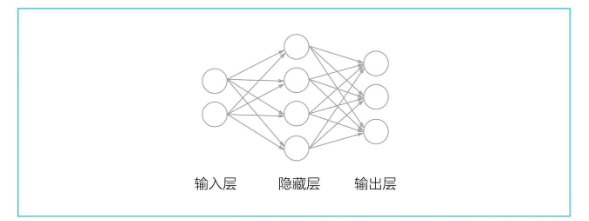

神经网络层结构：

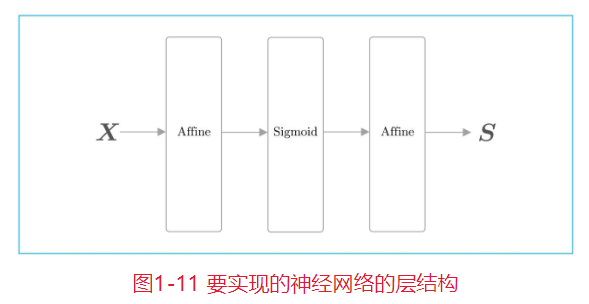

如图1-11所示，输入X经由Affine层、Sigmoid层和Affine层后输出得分S。我们将这个神经网络实现为名为TwoLayerNet的类，将主推理处理实现为predict（x）方法。

之前，我们在用图表示神经网络时，使用的是像图1-7那样的“神经元视角”的图。与此相对，图1-11是“层视角”的图。

### TwoLayerNet的代码如下所示

In [20]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        I,H,O = input_size,hidden_size,output_size
        # 初始化权重和偏置
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        # 生成层
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]

        # 将所有的权重整理到列表中
        self.params= []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

在这个类的初始化方法中，首先对权重进行初始化，生成3个层。然后，将要学习的权重参数一起保存在params列表中。这里，因为各个层的实例变量params中都保存了学习参数，所以只需要将它们拼接起来即可。这样一来，TwoLayerNet的params变量中就保存了所有的学习参数。像这样，通过将参数整理到一个列表中，可以很轻松地进行参数的更新和保存。

### Tip:params列表可以+=的原因

此外，Python中可以使用+运算符进行列表之间的拼接。下面是一个简单的例子。

        >>> a = ['A' , 'B']
        >>> a += ['C' , 'D']
        >>> a
        ['A', 'B', 'C', 'D']


如上所示，通过列表之间的加法将列表拼接了起来。在上面的TwoLayerNet的实现中，通过将各个层的params列表加起来，从而将全部学习参数整理到了一个列表中。现在，我们使用TwoLayerNet类进行神经网络的推理。

In [59]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
print(s)

[[-1.40815785 -2.75324442 -0.68087566]
 [-0.84448276 -2.14535182 -0.7192525 ]
 [ 0.39915813 -0.89634245 -0.67372793]
 [-0.32721563 -1.59895864 -0.68823956]
 [-0.59388923 -1.83488505 -0.65597035]
 [-0.75710188 -1.79384233 -0.34964915]
 [-0.97025609 -2.00975814 -0.4065426 ]
 [-0.25650267 -1.74562119 -0.96872542]
 [-0.59327156 -1.92385543 -0.7629768 ]
 [-0.77185477 -2.05221365 -0.70222556]]


### 备注:TwoLayerNet类

你编写的 TwoLayerNet 类表示一个简单的两层神经网络，其中每一层都是通过仿射（Affine）变换和激活函数（Sigmoid）组合而成。这是一个经典的前馈神经网络的设计，常用于处理如分类问题等任务。

我可以进一步解释这个代码的功能和工作原理：

1. 构造函数 __init__
- input_size: 输入层的大小，即输入特征的维度。
- hidden_size: 隐藏层的大小，即隐藏层神经元的数量。
- output_size: 输出层的大小，即输出的维度，通常用于多分类或回归任务。

在构造函数中，你进行了以下操作：

初始化权重和偏置：
- W1: 输入层到隐藏层的权重矩阵，形状为 (I, H)，即 input_size x hidden_size。
- b1: 隐藏层的偏置向量，形状为 (H,)。
- W2: 隐藏层到输出层的权重矩阵，形状为 (H, O)，即 hidden_size x output_size。
- b2: 输出层的偏置向量，形状为 (O,)。
- 权重和偏置是通过 np.random.randn 方法随机初始化的。这个方法会生成从标准正态分布（均值为0，方差为1）中抽取的随机数。

生成层：

使用 Affine 层（仿射变换层）和 Sigmoid 激活函数作为隐藏层的激活函数。这里，网络由以下三层构成：
- 输入经过第一个仿射层 Affine(W1, b1) 计算。
- 使用 Sigmoid 激活函数。
= 输出经过第二个仿射层 Affine(W2, b2) 计算。

整理权重到列表中：

将每一层的权重参数 params（假设 Affine 层有 params 属性存储权重和偏置）收集到一个 self.params 列表中，方便之后的更新或管理。

2. 前向传播函数 predict

predict 函数的功能是计算前向传播。它接收输入 x，然后逐层执行每个层的 forward 方法，将输出作为下一层的输入。

这里假设 Affine 和 Sigmoid 类都有 forward 方法，分别执行仿射变换和激活函数。

示例代码的完整性

为了让这个 TwoLayerNet 类完整运作，你需要定义 Affine 和 Sigmoid 类。以下是这两个类的示例实现：

In [60]:
import numpy as np

# 仿射层（线性变换层）
class Affine:
    def __init__(self, W, b):
        self.W = W  # 权重
        self.b = b  # 偏置
        self.params = [W, b]  # 将权重和偏置整理到params中
        
    def forward(self, x):
        # 进行仿射变换，线性运算 xW + b
        return np.dot(x, self.W) + self.b

# Sigmoid激活函数层
class Sigmoid:
    def __init__(self):
        self.params = []  # Sigmoid层没有参数
        
    def forward(self, x):
        # 计算Sigmoid函数
        return 1 / (1 + np.exp(-x))

# 测试
input_size = 4
hidden_size = 5
output_size = 3

# 初始化两层神经网络
net = TwoLayerNet(input_size, hidden_size, output_size)

# 输入一个样本，形状为 (1, input_size)
x = np.random.randn(1, input_size)

# 计算网络的输出
output = net.predict(x)
print(output)


[[-1.20228388 -1.89021118 -1.46129892]]


说明：
Affine 层: 它实现了线性变换 xW + b，其中 x 是输入，W 是权重矩阵，b 是偏置向量。

Sigmoid 层: 它是一个没有参数的激活函数层，执行 Sigmoid 函数的计算。

运行逻辑：

网络从输入层到隐藏层，经过仿射变换和 Sigmoid 激活。

随后，隐藏层到输出层再次经过仿射变换，输出结果。

### 备注：predict函数

在你的 `TwoLayerNet` 类中，`predict(self, x)` 方法用于**前向传播**，将输入数据通过网络的各个层，逐层计算得到输出。

下面是对该 `predict` 方法的具体解释：

 1. **方法解析**

```python
def predict(self, x):
    for layer in self.layers:
        x = layer.forward(x)
    return x
```

- **输入参数**：
  - `x`: 输入数据，通常是一个形状为 `(batch_size, input_size)` 的矩阵（批量输入的样本），其中 `batch_size` 是样本的数量，`input_size` 是每个样本的特征维度。

- **循环执行**：
  - `self.layers` 是网络中的各个层（如仿射层 `Affine` 和激活函数层 `Sigmoid`），它们已经在 `__init__` 中初始化并存储在 `self.layers` 列表中。
  - `layer.forward(x)`：对每一层执行前向传播操作，其中 `forward` 是每个层（如 `Affine` 和 `Sigmoid`）的前向传播函数，计算输入 `x` 的输出。
  
  **注意**：每次 `x = layer.forward(x)` 都会更新 `x`，即输入数据逐层传递并被逐步转换。第一次是原始输入数据，之后每次 `forward` 的输出会成为下一层的输入。

- **返回值**：
  - `return x`: 经过所有层后，最终的输出 `x` 就是整个神经网络的输出。

1. **预测的过程**

这个 `predict` 函数通过以下步骤工作：
1. **初始输入**: 输入 `x` 传递到网络的第一层。
2. **逐层计算**: 输入 `x` 经过每一层的 `forward` 方法，逐层传递（从输入层到输出层）。
   - **Affine** 层：执行仿射变换 `xW + b`。
   - **Sigmoid** 层：执行非线性激活函数。
3. **最终输出**：网络的最终输出是通过所有层计算的结果，并返回。

4. 示例流程

假设你已经定义了两层神经网络并使用 `Affine` 和 `Sigmoid` 层：

```python
input_size = 4   # 输入层大小
hidden_size = 5  # 隐藏层神经元数量
output_size = 3  # 输出层大小

net = TwoLayerNet(input_size, hidden_size, output_size)

# 假设输入一个样本，形状为 (1, 4) 对应 input_size
x = np.random.randn(1, input_size)

# 调用predict函数计算输出
output = net.predict(x)
print(output)
```

1. 各个层的作用

2. **第一层 (`Affine` 层)**:
   - 输入经过 $W1$ 和 $b1$，执行线性变换，输出进入激活函数层。
   
   $$
   z_1 = x \cdot W_1 + b_1
   $$

3. **第二层 (`Sigmoid` 层)**:
   - 对 $z_1$ 应用 Sigmoid 激活函数，产生非线性输出：
   
   $$
   a_1 = \sigma(z_1) = \frac{1}{1 + e^{-z_1}}
   $$

4. **第三层 (`Affine` 层)**:
   - Sigmoid 层的输出作为输入，经过第二个仿射层 `W2` 和 `b2` 进行线性变换，最终输出：
   
   $$
   z_2 = a_1 \cdot W_2 + b_2
   $$

5. 总结

- `predict` 方法是前向传播的核心，逐层执行 `forward`，并将每层的输出作为下一层的输入。
- 最终返回经过所有层计算后的输出，这就是神经网络的预测结果。